In [99]:
%load_ext autoreload 
%autoreload 2

import math
import numpy as np
import pandas as pd
from numpy import array
from numpy import array, arange, abs as np_abs
from numpy.fft import rfft, rfftfreq
from math import sin, pi
from scipy import signal
import matplotlib.pyplot as plt

import model as md
import view as vw

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [100]:
duration = 100e-6
F_main_real=440e3
fs = F_main_real*10

F_noise_1=100e3
F_noise_2=700e3
F_noise_3=200e3

phase_real=60

t = np.linspace(0, duration, int(duration * fs))  

U = md.generate_sin(t,F_main_real,2)+md.generate_sin(t,F_noise_1)+md.generate_sin(t,F_noise_2)+md.generate_sin(t,F_noise_3)
I=md.generate_sin(t,F_main_real,2,phase_real)+md.generate_sin(t,F_noise_1)+md.generate_sin(t,F_noise_2)+md.generate_sin(t,F_noise_3)

phase_real_graph= np.full(len(t), phase_real)

439978.16399286984


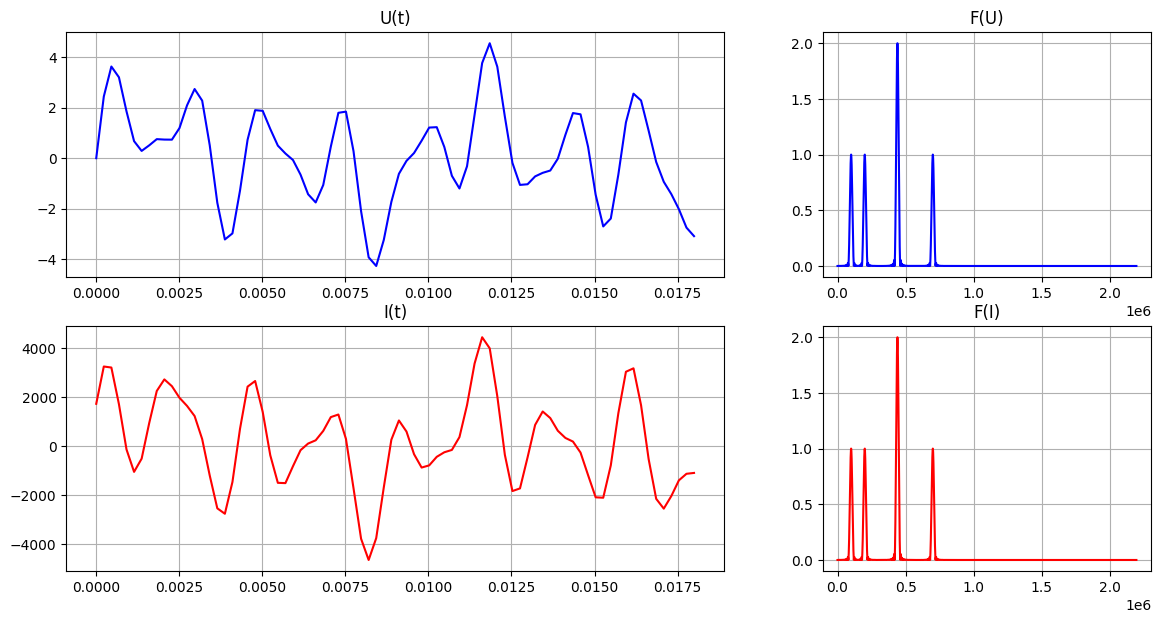

In [101]:
F,V = md.get_spectrum3(t,U)

F_peak_calc = F[np.argmax(V)]
T=1/F_peak_calc

print(F_peak_calc)

T_counts=md.convert_to_counts(t,T)

window=T_counts*8

vw.show_I_U_2(t,I,U,0,window)

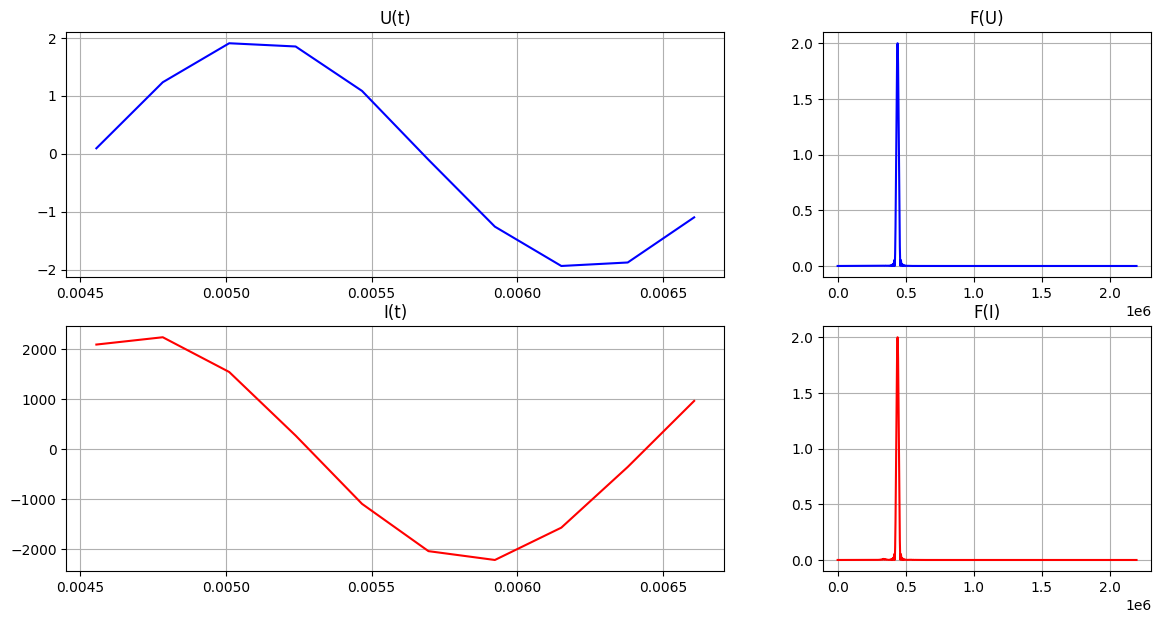

In [102]:
t_f, U_f=md.filter_butter_bandpass(t,U,F_peak_calc,100e3,5)
t_f, I_f=md.filter_butter_bandpass(t,I,F_peak_calc,100e3,5)

vw.show_I_U_2(t_f,I_f, U_f,T_counts*2,T_counts*3)

In [103]:
time_hilbert, phase_hilbert=md.get_phase_hilbert(t_f,U_f, I_f)

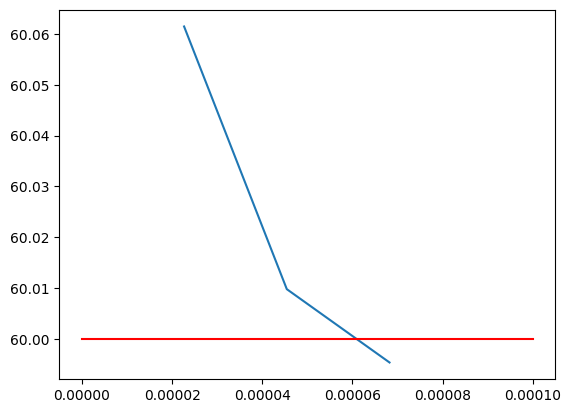

In [104]:
time_FFT, phase_FFT = md.get_phase_FFT(t_f,U_f, I_f, F_peak_calc, n_periods=20, overlap=0.5)
plt.plot(time_FFT, phase_FFT)
plt.plot(t,phase_real_graph,"red")

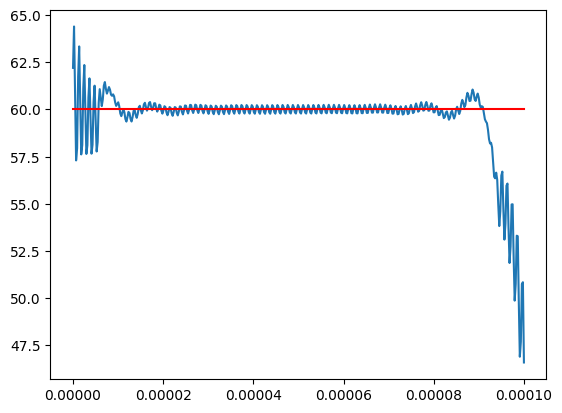

In [105]:
time_lockin, phase_lockin = md.get_phase_lockin(t_f,U_f, I_f,F_peak_calc,5)
plt.plot(time_lockin,phase_lockin)
plt.plot(t,phase_real_graph,"red")

In [106]:
def get_mid_value(sig):
    central_index=int(len(sig)/2)
    phase_central=sig[central_index]
    phase_mean=np.mean(sig[central_index-100:central_index+100])
    return phase_mean

In [107]:
print(get_mid_value(phase_hilbert))
print(get_mid_value(phase_FFT))
print(get_mid_value(phase_lockin))

60.00283794703766
60.022213188502235
59.999972170250345


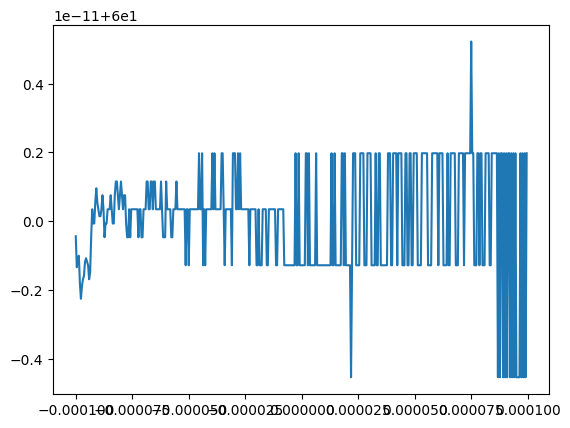

In [108]:
duration = 100e-6
F_main_real=440e3
fs = F_main_real*10

t_=np.linspace(-duration,duration,int(duration*fs), endpoint=False)
U = md.generate_sin(t_,F_main_real,2)
I=md.generate_sin(t_,F_main_real,2,60)

t2,f2=md.get_phase_hilbert(t_,U,I,F_main_real)

plt.plot(t2,f2)